In [2]:
#  Exercise 1- Creating an entangled state (classic Bell state |00> + |11>)

In [3]:
# Importing packages

In [4]:
# To make the circuit
from qiskit import QuantumCircuit

# To name the qubits
from qiskit import QuantumRegister, ClassicalRegister

# To visualize the statevector
from qiskit.quantum_info import Statevector

# To simulate a execution in a quantum computer  
from qiskit import Aer

# To visualize a bloch sphere
from qiskit.visualization import plot_state_qsphere

# To create a random state
from qiskit.quantum_info import random_statevector

# To execute the circuit in a real quantum computer
from qiskit import IBMQ
from qiskit import transpile
IBMQ.load_account()

# To visualize the results
from qiskit.visualization import plot_histogram

# To reverse a circuit
from qiskit.extensions import Initialize

In [5]:
# Creating the circuit with 2 qubits and 2 bits

In [6]:
circuit = QuantumCircuit(2, 2)

In [7]:
# Drawing the current circuit

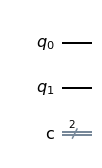

In [8]:
circuit.draw(output='mpl')

In [9]:
# Adding the logic Hadamart gate at the first qubit

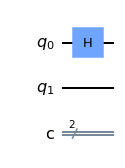

In [10]:
circuit.h(0)
circuit.draw(output='mpl')

In [11]:
# Adding the 'control not' logic gate with the first qubit controlling the second qubit

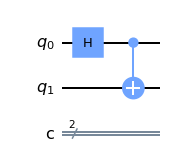

In [12]:
circuit.cx(0, 1)
circuit.draw(output='mpl')

In [13]:
# getting a simulator

In [14]:
simulator = Aer.get_backend('aer_simulator')

In [15]:
# Making the measurements of the 2 qubits and saving the results at the 2 classical bits

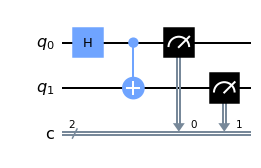

In [16]:
circuit.measure([0,1], [0,1])
circuit.draw(output='mpl')

In [17]:
# Running the circuit in the simulator

In [18]:
simulated_counts = simulator.run(circuit, count=1000).result().get_counts()

In [19]:
# Showing the results on the histogram

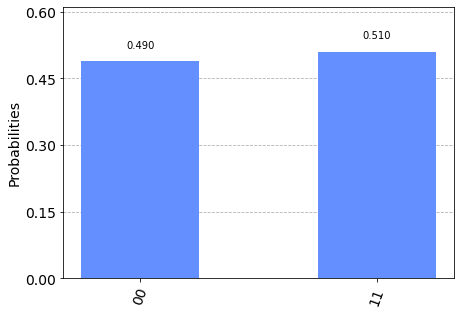

In [20]:
plot_histogram(simulated_counts)

In [21]:
# Running the circuit at a real IBM quantum computer and showing the results

In [22]:
real_computer = IBMQ.get_provider().get_backend('ibmq_belem')

In [23]:
# We need to make the 'transpile' because the IBM qc doesn't understand a 'Hadamard' command
real_counts = real_computer.run(transpile(circuit, real_computer))

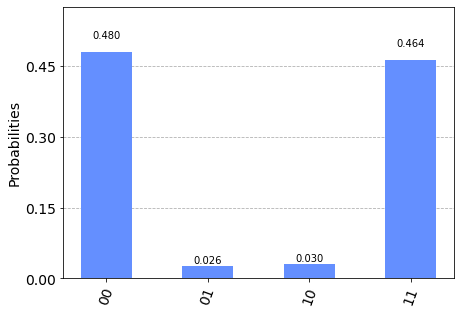

In [24]:
plot_histogram(real_counts.result().get_counts())

In [25]:
# When running the circuit at the real quantum computer
# we get some |01> and |10> results that would be impossible in theory
# This happens because the physical implementation of the circuit has inevitable
# interactions with it's environment that causes decoerence.

# In other words, the qubits states can change randomly, making small amplitudes of other states
# appear on our quantum state.
# That's why we got some |01> and |10> measurements that were not part of the initial state.

# On the simulator we didn't see such phenomenon because it was not configured (although it could be if we wanted) to
# simulate the effects caused by interactions with the local environment.

In [26]:
# 2- Quantum Teleportation

In [27]:
# Explanation:

# Many technological applications of quantum computing such as secure communication and encryption techniques require
# that it be possible to transport a qubit in an unknown state to a geographically distant region.

# This is a complicated task due to interaction effects with the environment that easily cause decoherence 
# and can alter the quantum states along the way.

# One option would be to copy the qubit many times, and send multiple qubits. 
# The receiver would process the received qubits and statistically determine which ones have decohered or not, by analyzing
# the most frequent results and inferring that these would be the actual states transmitted, assuming that the effects
# of decoherence were random.

# However, the no-cloning theorem shows that it is impossible to arbitrarily reproduce qubits
# in an unknown state.

# That leaves, then, the quantum teleportation protocol as our option.

# Suppose the message qubit Alice wants to teleport is in a state
# alpha |0> + beta |1>

# The strategy is to send 2 entrangled qubits in an already known state (Bell state -> sqrt(2)/2 * (|00> + |11>),
# one to Alice and the other to Bob.

# The overall state of the system then becomes
# (alpha |0> + beta |1>) tensor product [1/sqrt(2) * (|00> + |11>)]

# obs: I'll omit the constant root of 2 from here on to make it easier to write

# = alpha |000> + beta |111>

# Next, Alice entangles her message qubit with her qubit that is entangled with Bob's qubit.
# (she does this by applying a 'control not' operation between her message qubit and her qubit entangled with Bob)

# CX(1,2)

# Now, the global state would be:
# alpha |000> + alpha |011> + beta |101> + beta |110>

# In doing so, Alice has indirectly intertwined her message qubit
# with Bob's qubit

# The entanglement chain is now: Msg -> Alice qb -> Bob qb

# Alice proceeds by applying a Hadamart operation on her message qubit.

# H(2)

# Global state:
# alpha |000> + alpha |100> + alpha |011> + alpha |111>

# + beta |001> - beta |101> + beta |010> - beta |110>

# Thus, Alice transformed the total quantum system (qubit message + qubit Alice + qubit Bob) to a
# superposition of 8 states.

# Alice then measures her message qubit and her qubit that is intertwined Bob's qubit,
# save the results on 2 classical bits
# and sends these 2 classical bits with the results to Bob

# In doing so, she collapses the overall state of the system to only 2 possible states:

# If Alice measures...  | Bob's qubit will be  | for Bob to get the msg qubit (alpha |0> + beta |1>) he must do...
#                       |                      | 
# 00                    | alpha |0> + beta |1> |                       nothing!
#                       |                      |
# 01                    | alpha |1> + beta |0> |              reverse the bases -> NOT port
#                       |                      |  
# 10                    | alpha |0> - beta |1> |           changing the sign of |1> -> Z port
#                       |                      |
# 11                    | alpha |1> - beta |0> |   reverse the bases and change the sign of |1> -> NOT port and Z


# So Bob reads the incoming classical bits, and knows exactly what he must do with his qubit
# so that it becomes the message qubit.

# It is interesting to note that 2 classical bits can only store 2 bits of information, that is, 4 different states.

# However, a qubit can be in infinite states because its amplitude is continuous.

# How, then, can 2 bits send Bob the information contained in the message qubit?

# This is only possible because of entanglement and superposition.

# The classical bits are just intermediaries, the teleportation itself is only possible because of these 2 quantum effects.

In [28]:
# Creating qubits

In [29]:
msg = QuantumRegister(1, 'message')
alice = QuantumRegister(1, 'alice')
bob = QuantumRegister(1, 'bob')

In [30]:
# Creating classical bits
c1 = ClassicalRegister(1, 'transport_classical_bit_0')
c2 = ClassicalRegister(1, 'transport_classical_bit_1')
c3 = ClassicalRegister(1, 'check_classical_bit')

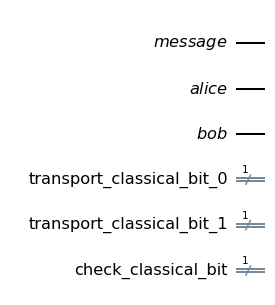

In [31]:
# Adding to the circuit
tele_circuit = QuantumCircuit(msg, alice, bob, c1, c2, c3)
tele_circuit.draw('mpl')

In [32]:
# Creating and visualizing a random state to teleport

In [33]:
random_msg = Initialize(random_statevector(2))

In [34]:
ket = Statevector(random_msg)

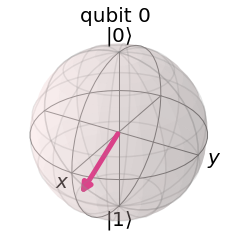

In [35]:
ket.draw(output='bloch')

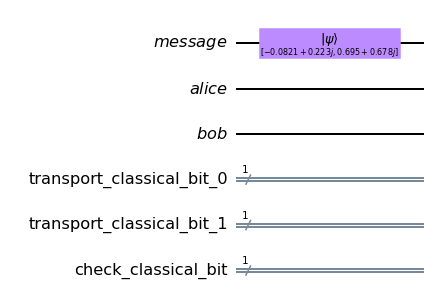

In [36]:
# Adding the random state qubit to the circuit
tele_circuit.append(random_msg, [0])
tele_circuit.draw('mpl')

In [37]:
# Writing the teleport protocol

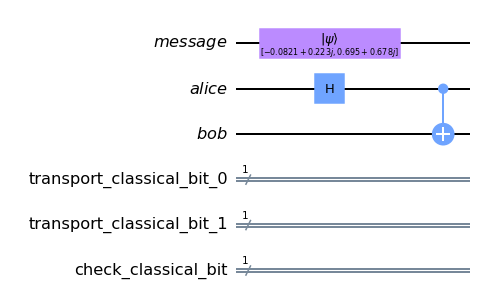

In [38]:
# Entangling Alice qubit with Bob qubit
tele_circuit.h(1)
tele_circuit.cx(1,2)
tele_circuit.draw('mpl')

In [39]:
# Checking the global state
ket = Statevector(tele_circuit)
ket.draw(output='latex')

<IPython.core.display.Latex object>

In [40]:
# We see that from left to right we have Alice and Bob's qubit in the Bell entangled state |00> or |11>
# The rightmost qubit |1> is the message qubit.

In [41]:
# Now Alice entangles the message qubit with her qubit

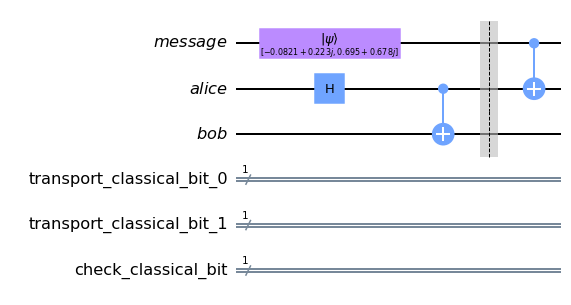

In [42]:
tele_circuit.barrier()
tele_circuit.cx(0, 1)
tele_circuit.draw(output='mpl')

In [43]:
# Checking the state
ket = Statevector(tele_circuit)
ket.draw(output='latex')

<IPython.core.display.Latex object>

In [44]:
# We see that we have a superposition of 4 states

In [45]:
# There is a problem, if Alice measures |00> for example

In [46]:
# Bob will necessarily only have the state |0>

In [47]:
# If Alice measures |01> for example, Bob will have his qubit in the |1> state

In [48]:
# But the Psi state we would like to transmit is composed of a superposition of |0> and |1>

In [49]:
# So we need to increase the number of component states

In [50]:
# So that Bob always has his qubit in a superposition state between |0> and |1> after Alice's measurements

In [51]:
# This is done by passing the message qubit through a Hadamart port

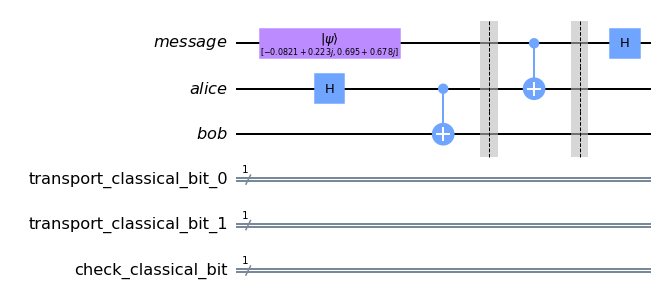

In [52]:
tele_circuit.barrier()
tele_circuit.h(0)
tele_circuit.draw(output='mpl')

In [53]:
ket = Statevector(tele_circuit)
ket.draw(output='latex')

<IPython.core.display.Latex object>

In [54]:
# Now we see that the global state of the quantum system is a superposition of all 8 base states

In [55]:
# We also see that whatever Alice measures, Bob will have a superposition between |0> and |1>
# However, this superposition is only the 'message' state when Alice measures |00>
# In the other cases, Bob's state has it's phase or base componenets reversed.
# So his qubit still needs to be processed to make sure it always transforms to the correct 'message

In [56]:
# Simulating Alice's measurements on her 2 qubits

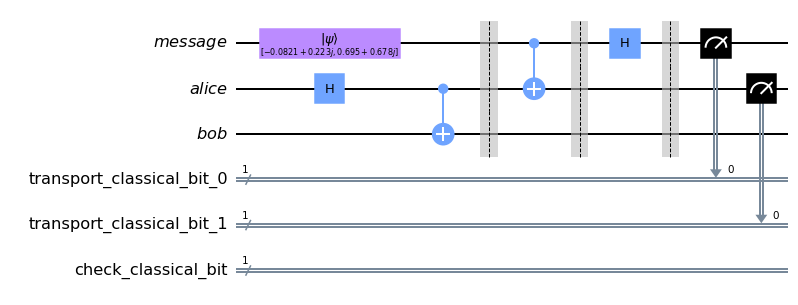

In [57]:
tele_circuit.barrier()
tele_circuit.measure([0,1], [0,1])
tele_circuit.draw(output='mpl')

In [58]:
# Adding the correction gates to Bob's qubit

In [59]:
tele_circuit.barrier()
tele_circuit.x(2).c_if(c2, 1)
tele_circuit.z(2).c_if(c1, 1)

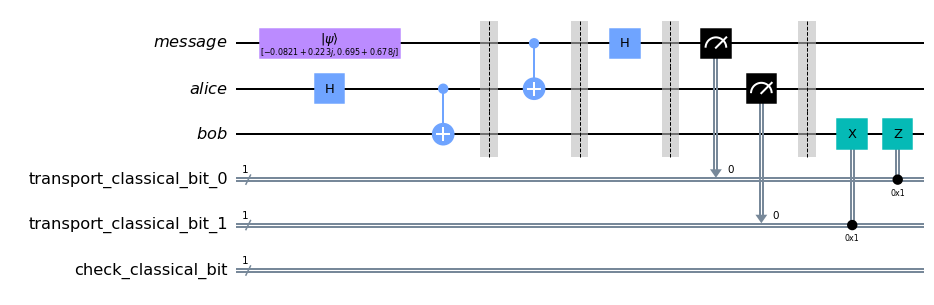

In [60]:
tele_circuit.draw(output='mpl')

In [61]:
# Now we will show the state vector of Bob's qubit
# And compare it to the original state of the 'message' qubit

In [62]:
simulator = Aer.get_backend('aer_simulator')

In [63]:
tele_circuit.save_statevector()

In [64]:
vetor_global = simulator.run(tele_circuit).result().get_statevector()

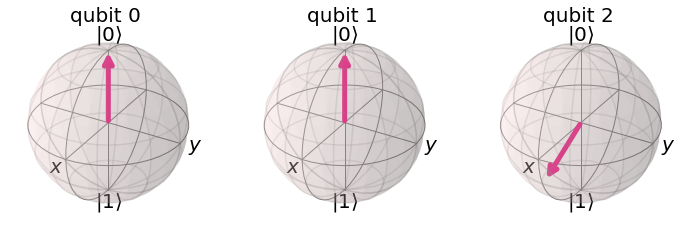

In [65]:
vetor_global.draw(output='bloch')

In [66]:
vetor_global.draw('latex')

<IPython.core.display.Latex object>

In [67]:
# Comparing Bob's qubit (qubit 2) with the 'message' qubit

In [68]:
ket = Statevector(msg_aleatoria)
ket.draw(output='bloch')

NameError: name 'msg_aleatoria' is not defined

In [ ]:
ket.draw('latex')

In [ ]:
# Since the state of the Psi qubit we created is random, in order to know if the teleportation was successful
# using a histogram we need to apply the same gates that does |0> -> |message>
# in reverse to Bob's qubit
# and then check if we arrive at qubit |0>

In [ ]:
# If this always happens, it means that the circuit is correctly implementing the teleportation protocol

In [69]:
# Creating a circuit that transforms the random state of the 'message' to |0>
reverse_circuit = Initialize(ket).gates_to_uncompute()

In [70]:
# Adding the circuit that undoes the 'message' in the original circuit
tele_circuit.append(reverse_circuit, [2])

CircuitError: 'The amount of qubit arguments 1 does not match the instruction expectation (3).'

In [71]:
# Measuring Bob's qubit after it has theoretically returned to the |0> state, and saving
# its state in the third classical bit

In [72]:
tele_circuit.measure([2], [2])

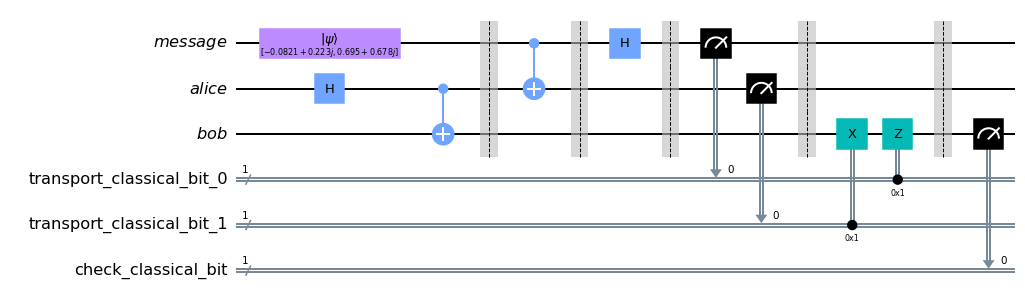

In [73]:
tele_circuit.draw(output='mpl')

In [74]:
# Now, we'll simulate the above circuit several times, and see how many times the classical bit referring to
# the teleportation check will be measured in the state |0>
# If the teleportation really occurs, it should happen every time
# because it means that Bob's qubit was in the same state as the 'message' qubit at all times

In [75]:
simulator = Aer.get_backend('aer_simulator')

In [76]:
# We need to use the transpile to "open" the circuit that sends the 'message' back to the state |0>
simulated_counts = simulator.run(transpile(tele_circuit, simulator), count=1000).result().get_counts()

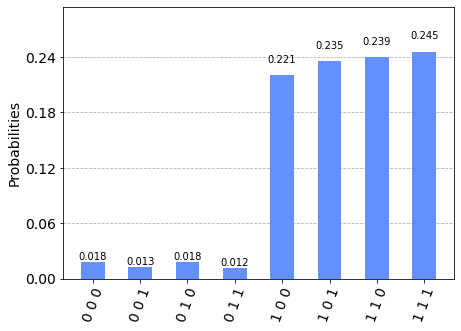

In [77]:
plot_histogram(simulated_counts)

In [78]:
# We can see that Bob's qubit (first from left to right) is always in the state |0>
# showing that the teleportation protocol has been implemented correctly

In [79]:
# The implementation of the teleportation protocol in a real IBM quantum computer
# requires modifying the circuitry to use the 'deferred measurement principle
# because they still don't accept instructions for actions after measurements.

# I will not demonstrate it here, since it is more advanced and specific to the IBM implementation
# I believe that the protocol has already been shown here in the simulator.

# More details on IBM's website: https://learn.qiskit.org/course/ch-algorithms/quantum-teleportation